In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
Root = "/content/drive/MyDrive/Music Genre Detection/Data"
os.chdir(Root)

**Importing all required libraries in the project**

In [ ]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
audio_dataset_path='/content/drive/MyDrive/Music Genre Detection/Data/genres_original'
metadata=pd.read_csv('/content/drive/MyDrive/Music Genre Detection/Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


**Since the audio signals are constantly changing, first we divide these signals into smaller frames. Each frame is around 20-40 ms long Then we try to identify different frequencies present in each frame.**

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
# metadata.drop(labels=552, axis=0, inplace=True)

In [ ]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    try:
        final_class_labels=row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))
        data=features_extractor(file_name)
        extracted_features.append([data,final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

554it [04:00,  2.67it/s]<ipython-input-33-2480e1218014>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
555it [04:01,  2.21it/s]

Error: 


1000it [06:55,  2.40it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [ ]:
extracted_features_df['class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: class, dtype: int64

**Split the dataset into independent and dependent dataset**

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(999, 40)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y.shape

(999, 10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[ 2.6653410e+01,  7.9789711e+01, -5.2055866e+01, ...,
        -1.4430333e+00, -1.2734197e+00, -5.9081388e+00],
       [-1.4495711e+02,  1.1846496e+02,  2.0525068e+01, ...,
         1.8998557e+00, -1.8821739e+00, -1.8517891e+00],
       [-6.6108925e+01,  9.7883812e+01, -1.8831676e+01, ...,
        -1.2424636e+00, -6.3691193e-01, -1.3383396e+00],
       ...,
       [-7.7426697e+01,  1.3087869e+02, -2.3275221e+01, ...,
        -4.2062173e+00, -3.5183537e+00,  2.6050334e+00],
       [-1.9040649e+02,  1.2951292e+02, -7.8296256e+00, ...,
        -2.2419319e+00, -3.9879441e+00, -1.9877433e+00],
       [-4.6609550e+01,  8.6802017e+01, -3.4776672e+01, ...,
         1.4676012e-01,  9.2151541e-01, -8.7239444e-01]], dtype=float32)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799, 40)
(200, 40)
(799, 10)
(200, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
model.add(Dense(1024,input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)

In [ ]:

## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
24/25 [===========================>..] - ETA: 0s - loss: 4.3703 - accuracy: 0.1159
Epoch 00001: val_loss improved from inf to 2.26281, saving model to saved_models/audio_classification_05:07:57.hdf5
25/25 [==============================] - 2s 26ms/step - loss: 4.3070 - accuracy: 0.1151 - val_loss: 2.2628 - val_accuracy: 0.1300
Epoch 2/100
24/25 [===========================>..] - ETA: 0s - loss: 2.6247 - accuracy: 0.1146
Epoch 00002: val_loss did not improve from 2.26281
25/25 [==============================] - 0s 14ms/step - loss: 2.6098 - accuracy: 0.1214 - val_loss: 2.2691 - val_accuracy: 0.1450
Epoch 3/100
21/25 [========================>.....] - ETA: 0s - loss: 2.4047 - accuracy: 0.1146
Epoch 00003: val_loss improved from 2.26281 to 2.24263, saving model to saved_models/audio_classification_05:07:57.hdf5
25/25 [==============================] - 0s 18ms/step - loss: 2.3976 - accuracy: 0.1189 - val_loss: 2.2426 - val_accuracy: 0.2050
Epoch 4/100
22/25 [===================

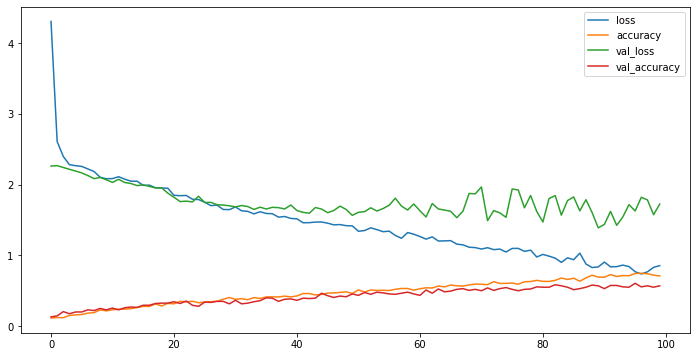

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [ ]:
!wget https://raw.githubusercontent.com/abcom-mltutorials/music/master/bhatiyar.mp3

--2023-05-08 04:48:39--  https://raw.githubusercontent.com/abcom-mltutorials/music/master/bhatiyar.mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5335040 (5.1M) [application/octet-stream]
Saving to: ‘bhatiyar.mp3.3’

bhatiyar.mp3.3      100%[===================>]   5.09M  --.-KB/s    in 0.1s    

2023-05-08 04:48:39 (45.7 MB/s) - ‘bhatiyar.mp3.3’ saved [5335040/5335040]



In [ ]:
src = "/content/bhatiyar.mp3"
dst = "test.wav"

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
###from pydub import AudioSegment
from pydub import AudioSegment

In [ ]:
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

In [ ]:

audio_file="/content/test.wav"

In [ ]:
audio_feature=features_extractor(audio_file)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)

In [ ]:
pred_audio=audio_feature

In [ ]:
pred_audio

array([-2.3520059e+02,  1.2387175e+02, -2.2546131e+01,  5.2951675e+01,
       -1.4538208e+00,  2.4660511e+01, -7.0884738e+00,  1.4890100e+01,
       -1.2783066e+01,  1.6718231e+01, -2.9434726e+00,  1.0081299e+01,
       -1.5028531e+01,  3.1190755e+00, -7.1235514e+00,  1.7955873e+00,
       -7.0771871e+00,  2.3404598e-02, -2.0338798e+00,  1.1501081e+00,
       -5.1028481e+00, -1.9207364e+00, -2.4087029e+00, -5.8205528e+00,
       -1.2543029e+01, -9.1261854e+00,  5.6508803e+00,  3.6848648e+00,
        3.1544328e+00, -8.8116179e+00, -7.8562846e+00, -4.7498784e+00,
       -3.3666068e-01, -8.2353611e+00, -4.7341542e+00, -6.6724620e+00,
       -5.7475915e+00, -5.9541826e+00, -5.2539773e+00,  1.7758617e+00],
      dtype=float32)